In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from tslearn.datasets import CachedDatasets, UCR_UEA_datasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from tslearn.metrics import cdist_dtw

from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


In [25]:
# データセット可視化メソッド
def plot_data(X_train, y_train, name):
    plt.figure(figsize=(12,5))

    # true
    # plt.subplot(1, 2, 1)
    label = np.unique(y_train)
    # カラーマップを定義
    cmap = plt.get_cmap('tab10')  # タブルランカラーマップを使用
    colors = [cmap(i) for i in range(len(label))]

    for class_label in label:
        class_data = X_train[y_train == class_label][:,:,0].T
        plt.plot(class_data, label=f'_Class {class_label}', color=colors[class_label - 1], alpha=0.4)
        plt.plot([], label=f'Class {class_label}', color=colors[class_label - 1], alpha=0.3)

    plt.legend()
    # plt.text(0.05,0.95,'pred', transform=plt.gca().transAxes)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'{name}')

    plt.tight_layout()
    plt.show()

# クラスタリング結果可視化メソッド
def plot_result(X_train, y_train, models, distance_matrix, data_name):
    n_model = len(models)+1
    plt.figure(figsize=(12,5 * math.ceil(n_model/2)))

    # true
    plt.subplot(math.ceil(n_model/2), 2, 1)
    label = np.unique(y_train)
    # カラーマップを定義
    cmap = plt.get_cmap('tab10')  # タブルランカラーマップを使用
    colors = [cmap(i) for i in range(len(label))]

    for class_label in label:
        class_data = X_train[y_train == class_label][:,:,0].T
        plt.plot(class_data, label=f'_Class {class_label}', color=colors[class_label - 1], alpha=0.4)
        plt.plot([], label=f'Class {class_label}', color=colors[class_label - 1], alpha=1)

    plt.legend()
    # plt.text(0.05,0.95,'pred', transform=plt.gca().transAxes)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'{data_name} True')

    # pred
    n=2
    for name, model in models.items():
        plt.subplot(math.ceil(n_model/2),2,n)
        y_pred = model.predict(distance_matrix)

        label = np.unique(y_pred)
        # カラーマップを定義
        cmap = plt.get_cmap('tab10')  # タブルランカラーマップを使用
        colors = [cmap(i) for i in range(len(label)+1)]

        for class_label in label:
            class_data = X_train[y_pred == class_label][:,:,0].T
            plt.plot(class_data, label=f'_Class {class_label}', color=colors[class_label - 1], alpha=0.4)
            plt.plot([], label=f'Class {class_label}',
                    color=colors[class_label - 1])

        plt.legend()
        # plt.text(0.05,0.95,'pred', transform=plt.gca().transAxes)
        plt.xlabel('Time')
        plt.title(f'{name} Pred')

        n += 1

    plt.tight_layout()
    plt.show()

### t-SNEで次元削減してプロット、異常検知モデルを２つ試す

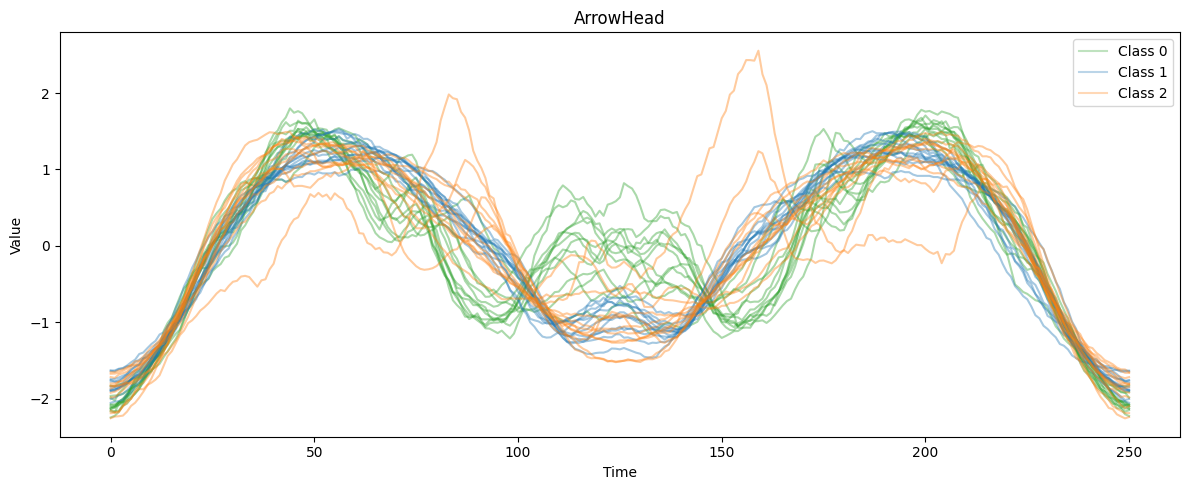

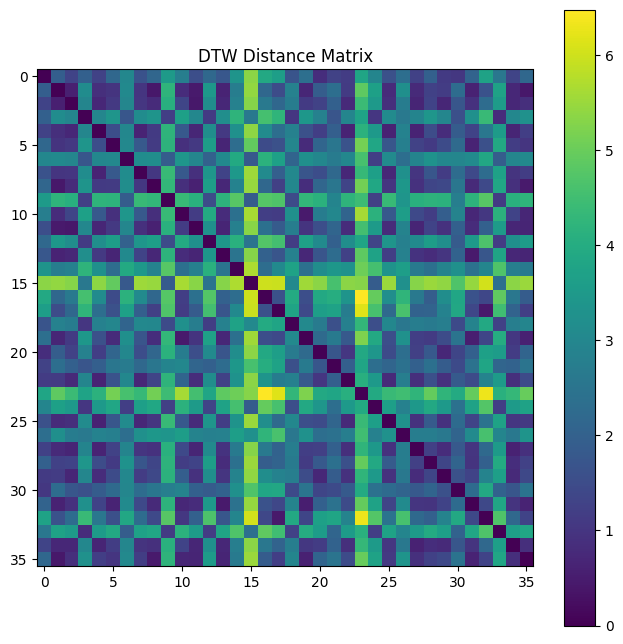

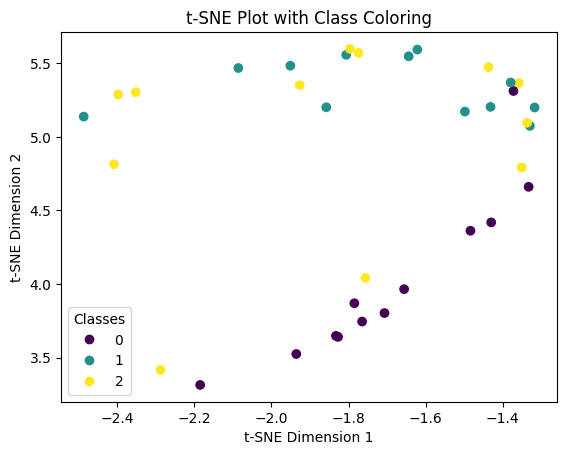

fitting...  LocalOutlierFactor
fitting...  IsolationForest


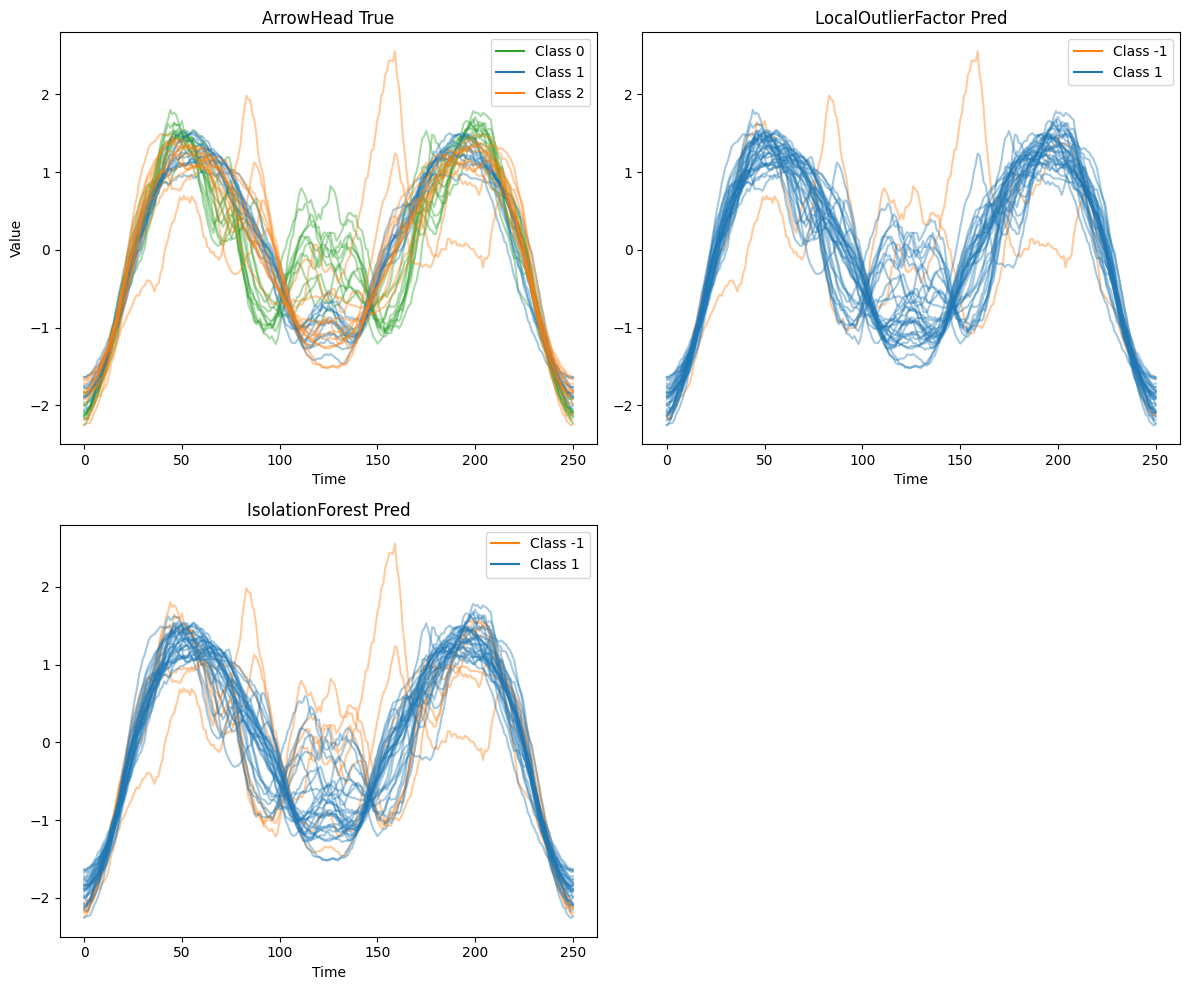

In [26]:
data_name = 'ArrowHead'


# データセットの読み込み（ここではUCR/UEAデータセットを使用）
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset(data_name)

plot_data(X_train, y_train, data_name)

# DTWの距離行列を計算
distance_matrix = cdist_dtw(X_train)
# ヒートマップのプロット
plt.figure(figsize=(8, 8))
plt.imshow(distance_matrix, cmap='viridis', interpolation='nearest')
plt.title("DTW Distance Matrix")
plt.colorbar()
plt.show()

# t-SNEで次元削減
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(distance_matrix)

# クラスごとに色分け
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='viridis')
plt.legend(*scatter.legend_elements(), title="Classes")
# plt.colorbar()

# 散布図をプロット
plt.title("t-SNE Plot with Class Coloring")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


models = {
    'LocalOutlierFactor':LocalOutlierFactor(
        n_neighbors=20,
        novelty=True
    ),
    'IsolationForest':IsolationForest(
        random_state=0,
    )

}


for name, model in models.items():
    print('fitting... ', name)
    model.fit(distance_matrix)


plot_result(X_train, y_train, models, distance_matrix, data_name)

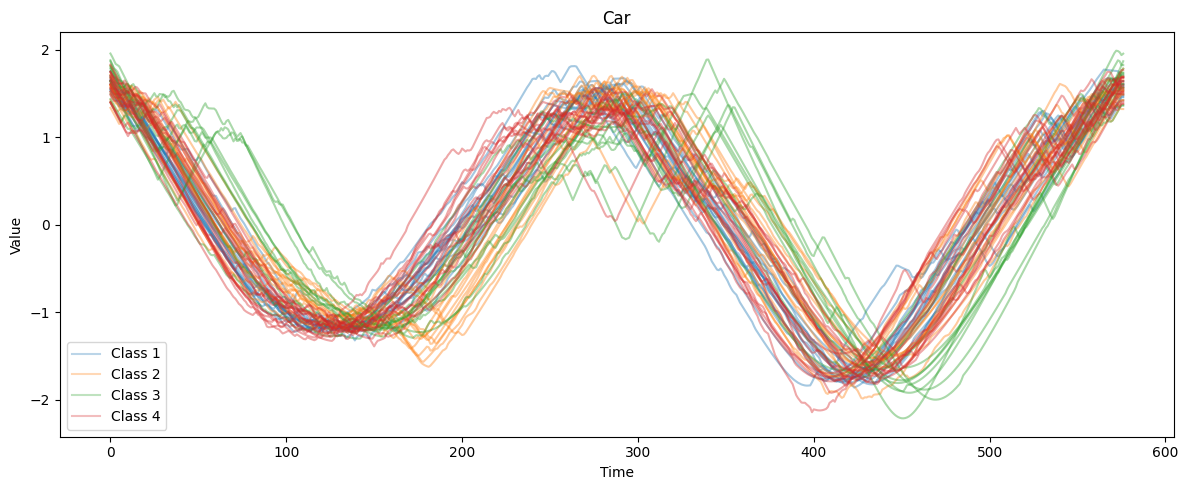

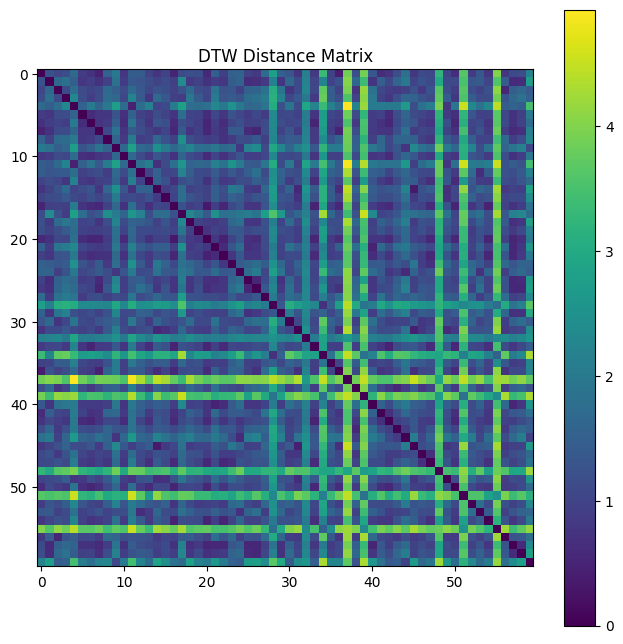

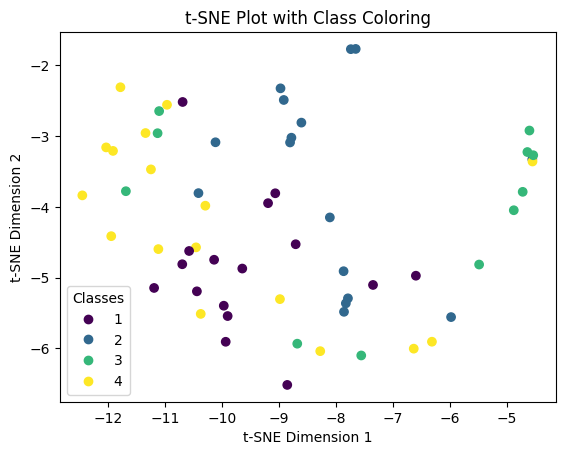

fitting...  LocalOutlierFactor
fitting...  IsolationForest


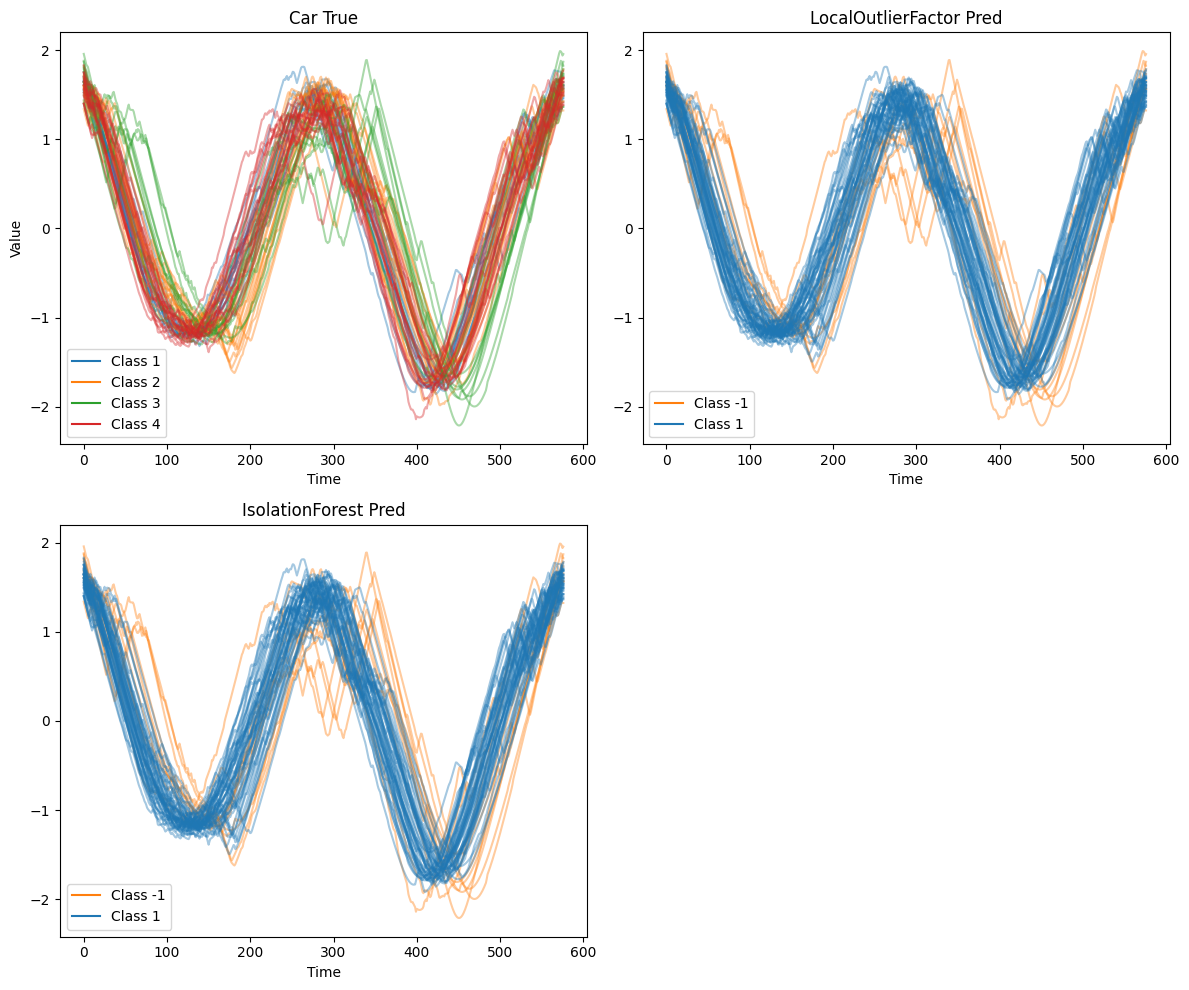

In [27]:
data_name = 'Car'


# データセットの読み込み（ここではUCR/UEAデータセットを使用）
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset(data_name)

plot_data(X_train, y_train, data_name)

# DTWの距離行列を計算
distance_matrix = cdist_dtw(X_train)
# ヒートマップのプロット
plt.figure(figsize=(8, 8))
plt.imshow(distance_matrix, cmap='viridis', interpolation='nearest')
plt.title("DTW Distance Matrix")
plt.colorbar()
plt.show()

# t-SNEで次元削減
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(distance_matrix)

# クラスごとに色分け
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='viridis')
plt.legend(*scatter.legend_elements(), title="Classes")
# plt.colorbar()

# 散布図をプロット
plt.title("t-SNE Plot with Class Coloring")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


models = {
    'LocalOutlierFactor':LocalOutlierFactor(
        n_neighbors=20,
        novelty=True
    ),
    'IsolationForest':IsolationForest(
        random_state=0,
    )

}


for name, model in models.items():
    print('fitting... ', name)
    model.fit(distance_matrix)


plot_result(X_train, y_train, models, distance_matrix, data_name)